# ADS Homework 3

## 1: Classification of Hand-Written Digits

Sklearn provides a dataset of handwritten digits as one of the examples. This data includes impages of 1787 digits. For each digit, we have 64 variables x1,x2,...x64, each one representing a pixel (grayscale from 0 to 16) on the 8x8 image. The label (y) for each image is the actual digit it represents from 0 to 9.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import t

In [2]:
#Load the data
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data # the digits data
y = digits.target # the labels for the digits. This label is only used for coloring the points.
#Make a dataframe
data=pd.DataFrame(np.concatenate((y.reshape(len(y),1),X),axis=1))
data.columns=["y"]+["x{}".format(i) for i in range(1,65)]
data.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
0,0.0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,2.0,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,3.0,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,4.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [3]:
#original image data is a 2D array
X.shape

(1797, 64)

#### If we take the first 10 observations and reconstruct the graph and we could see:  

Label:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


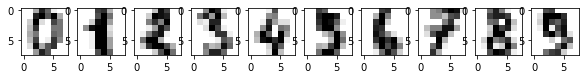

In [4]:
#plot the digits using imshow from matplotlib
plt.figure(figsize=(10,1))
print("Label:{}".format(list(y[:10])))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X[i].reshape(8,8), cmap=plt.cm.gray_r)
plt.show()

### Task 1: Apply PCA to see if we can describe the data with a smaller number of most significant features

In [5]:
from sklearn.decomposition import PCA

## code here
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X)
XS=scaler.transform(X)  
pca = PCA(X.shape[1])
XPCA=pca.fit_transform(XS)
eigenvalues = pca.explained_variance_ratio_

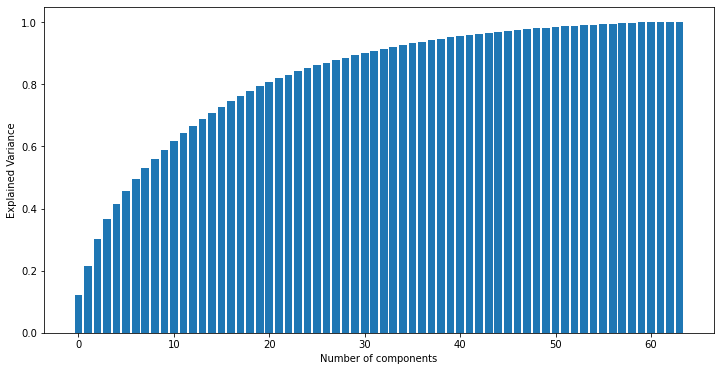

In [6]:
#Plot explained variance per number of leading PC's 
n=64
plt.figure(figsize=(12,6))
plt.bar(np.arange(n), eigenvalues[:n].cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

In [7]:
#describe in a few words what you can infer from the above plot

A: From the above plot, if we want to describe most of the data by choosing principal components, we really have a large number of components to choose from. When n=20, we could explain 80% of the data. If we want to explain almost 90% of the data, we can choose n=30.

### Task 2: Now use three leading PCs to visualize the digits (different colors for different digits)

/var/folders/xl/4ds0dc0n3bsgmz9dc_7nhr6h0000gn/T/ipykernel_5664/2605756189.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=-150, azim=110)


Text(0.5, 0, '$PC3$')

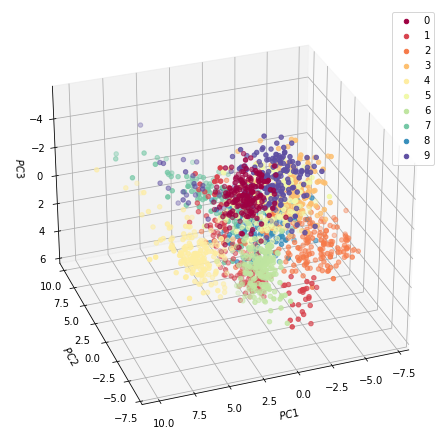

In [8]:
# use matplotlib 3D scatter plot: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
cmap=plt.cm.Spectral(np.linspace(0, 1, 10))
#cmap=plt.cm.Spectral(np.linspace(0, 1, 1797))

## code here
a=PCA(n_components=3)
X_PCA=a.fit_transform(XS)
#data_new = pd.DataFrame({"y":y,"PC1":X_PCA[:,0],"PC2":X_PCA[:,1],"PC3":X_PCA[:,2]})

new_data = pd.DataFrame({"y":y, "PC1":X_PCA[:,0], "PC2":X_PCA[:,1], "PC3":X_PCA[:,2]})
colors = cmap

for d in range(0,10):
    ax.scatter(new_data[new_data["y"]==d]["PC1"],
               new_data[new_data["y"]==d]["PC2"],
               new_data[new_data["y"]==d]["PC3"],
               color=colors[d])
plt.legend([i for i in range(10)],loc='upper right')
ax.set_xlabel('$PC1$')
ax.set_ylabel('$PC2$')
ax.set_zlabel('$PC3$')

### Task 3: Find six examples of the pairs of digits which a) can and b) can not be clearly distinguished on a 2D plot of  first two PCs (3 examples each)

Label:[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]


<Figure size 576x432 with 0 Axes>

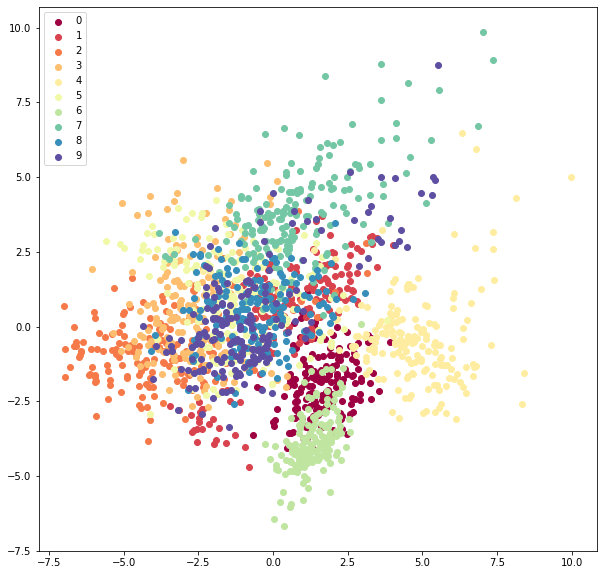

In [9]:
## code here
scaler_X = preprocessing.StandardScaler().fit(X)
XS=scaler_X.transform(X)

plt.figure(figsize=(8,6))
pca = PCA(n_components = 2) 
X_pca = pca.fit_transform(XS) 

y = data.iloc[:, 0].values
data_new1 = pd.DataFrame({"y":y,"PC1":X_pca[:,0],"PC2":X_pca[:,1]})

cmap=plt.cm.Spectral(np.linspace(0, 1, 10))
colors = cmap
print("Label:{}".format(list(y[:10])))


fig = plt.figure(figsize=(10,10))
for d in range(0,10):
    plt.scatter(data_new1[data_new1["y"]==d]["PC1"],
                data_new1[data_new1["y"]==d]["PC2"], 
                color=colors[d])
plt.legend(['0','1','2','3','4','5','6','7','8','9'],loc='upper left')

## 2. PCA for feature engineering

Another common application of PCA is overcomming multicollinearity and overfitting in regression models. Here we'll use PCA for reducing dimensionality of a data set and improving the accuracy in the regression task.

In [10]:
#read data
data=pd.read_csv("https://raw.githubusercontent.com/CUSP2022ADS/Data/main/pca_synthetic.csv")
data.head()

,Y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,3.035437,-18.227424,30.521149,-37.494755,31.108940,-8.917930,13.177162,10.153335,17.521327,14.695400,7.222120,3.142381,13.754352,0.115685,6.263643,8.957240
1,1.479243,31.210052,8.273238,17.545475,8.013616,-3.163515,12.632948,10.384905,7.278064,11.506060,21.150410,14.558149,15.393978,13.701066,14.993476,17.993337
2,-1.193325,-2.427634,1.698858,-1.980364,-9.902694,9.215057,9.984092,7.627307,7.701929,15.254064,15.665984,6.676761,14.504275,19.329674,11.312780,13.360359
3,0.634462,-10.778091,-4.718246,-4.861350,13.543559,-10.575067,25.562832,2.064966,12.297941,7.063591,14.787318,4.751835,16.473578,15.697654,3.765299,8.776716
4,-0.125792,5.547746,-10.935812,-1.397010,1.977636,-17.475947,13.159905,18.881544,4.986746,12.079755,13.762270,5.192296,11.656484,13.370774,16.536450,7.264736


### Task 1: Run a linear regression with 'Y' as the target and x1-x15 as regressors and report out of sample R2 score

Split the data into training and test (choose 70:30 split) and report out of sample score with test data. Also comment on the significance of the regressors (based on p-values)

In [11]:
## code here
from sklearn.model_selection import train_test_split
X1 = data.iloc[:,1:]
y1 = data.Y

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.3)
lm1 = sm.OLS(y1_train, sm.add_constant(X1_train)).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     6.021
Date:                Sun, 06 Mar 2022   Prob (F-statistic):           0.000197
Time:                        17:13:50   Log-Likelihood:                -35.313
No. Observations:                  35   AIC:                             102.6
Df Residuals:                      19   BIC:                             127.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.7602      3.184     -3.066      0.0

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [12]:
## report mean out-of-sample R2 score
from sklearn.metrics import r2_score
y1_pred = lm1.predict(sm.add_constant(X1_test))
R_OS = r2_score(y1_test, y1_pred)
print("OS R-squared is %.6f"%(R_OS))

OS R-squared is 0.702614


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Task 2: Try PCA - use a few leading principal components as regressors and see if they will perform better in the regression

You can choose the number of PCs by either checking explained variance or by trying out different numbers and choosing one that works best.

Split the data into training and test and report mean test accuracy

In [13]:
## run PCA
## code here

scaler = preprocessing.StandardScaler().fit(X1)
X1S=scaler.transform(X1) 

pca_task2_1 = PCA(X1.shape[1])
X1_PCA=pca_task2_1.fit_transform(X1S)

eigenvalues = pca_task2_1.explained_variance_ratio_

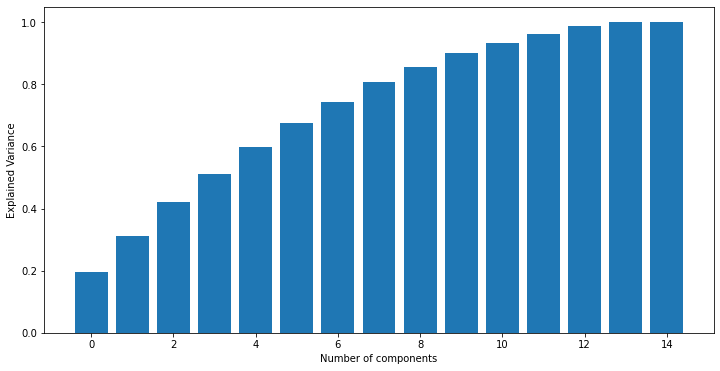

In [14]:
## plot explained variance barplot and comment on the appropriate number of eigenvectors based on that
n=15
plt.figure(figsize=(12,6))
plt.bar(np.arange(n), eigenvalues[:n].cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

From the above plot, we could choose n = 7 to explain around 80% of  the data

In [15]:
## choose leading number of PCs as regressors and run linear regression again

# n = 7
a1=PCA(n_components=7)
X1_PCA_n3=a1.fit_transform(X1S)

In [16]:
y1 = data.Y
X2_train, X2_test, y2_train, y2_test = train_test_split(X1_PCA_n3,y1,test_size=0.3)
lm2 = sm.OLS(y2_train, sm.add_constant(X2_train)).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     4.921
Date:                Sun, 06 Mar 2022   Prob (F-statistic):            0.00111
Time:                        17:13:50   Log-Likelihood:                -52.086
No. Observations:                  35   AIC:                             120.2
Df Residuals:                      27   BIC:                             132.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5579      0.212      2.633      0.0

In [17]:
## report out of sample mean R2 score

# n = 7
y2_pred = lm2.predict(sm.add_constant(X2_test))
R_OS = r2_score(y2_test, y2_pred)
print("When n=7, OS R-squared is %.6f"%(R_OS))

When n=7, OS R-squared is 0.086758


## 3: Modeling mean income with 311 complaint patterns

We'll use 311 complaints data set to model the mean income of zip codes in NYC. We will aslo check if using PCA in this case improves the performance as compared to just the linear model.

In [18]:
#load the income data
dataIncome=pd.read_csv("https://raw.githubusercontent.com/CUSP2022ADS/Data/main/MeanZIP.csv",index_col=0)
dataIncome=dataIncome.apply(pd.to_numeric, errors='coerce')
dataIncome=dataIncome.loc[dataIncome.Mean>0]
dataIncome.head()

,Median,Mean,Pop
Zip,,,
1001,56662.5735,66687.7509,16445
1002,49853.4177,75062.6343,28069
1003,28462.0000,35121.0000,8491
1005,75423.0000,82442.0000,4798
1007,79076.3540,85801.9750,12962


In [19]:
## 311 data
data311 = pd.read_csv('https://raw.githubusercontent.com/CUSP2022ADS/Data/main/aggr311.csv' , index_col=0 )
data311.Zip=pd.to_numeric(data311.Zip,errors='coerce')
data311=data311.loc[(data311.Zip>=10000)&(data311.Zip<11500)] #take only NYC zip codes
data311=pd.pivot_table(data311,index='Zip',columns='Complain',values='Count',fill_value=0)
Total311=data311.sum(axis=1) #total 311 activity per zip code
data311=data311.div(data311.sum(axis=1), axis=0) #normalize activity of various cathegories within zip code by total
data311=data311.loc[Total311>100] #keep only those zip codes having sufficient activity
data311.head()

Complain,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,BEST/Site Safety,Beach/Pool/Sauna Complaint,Bike Rack Condition,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
Zip,,,,,,,,,,,,,,,,,,,,,
10000.0,0.000000,0.000000,0.008772,0.0,0.000000,0.008772,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.070175,0.070175,0.000000,0.000000,0.000000,0.0,0.0
10001.0,0.000000,0.000146,0.013179,0.0,0.000000,0.000146,0.002929,0.005272,0.000146,0.000146,...,0.000439,0.000000,0.000293,0.007468,0.000732,0.000732,0.000293,0.053595,0.0,0.0
10002.0,0.001330,0.000000,0.007095,0.0,0.000000,0.001862,0.001596,0.001774,0.000177,0.000532,...,0.000443,0.000089,0.000355,0.002394,0.001242,0.000887,0.000621,0.028734,0.0,0.0
10003.0,0.001331,0.000089,0.012690,0.0,0.000177,0.003905,0.002130,0.001154,0.000177,0.000177,...,0.000621,0.000976,0.000177,0.004792,0.002218,0.001065,0.000444,0.028219,0.0,0.0
10004.0,0.000000,0.000000,0.009740,0.0,0.000000,0.002597,0.001948,0.000649,0.000000,0.000649,...,0.000649,0.000649,0.000000,0.010390,0.013636,0.000000,0.000000,0.024026,0.0,0.0


In [20]:
#merge income data with 311
DataIncome=dataIncome.merge(data311,left_index=True,right_index=True)
DataIncome.head()

,Median,Mean,Pop,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
Zip,,,,,,,,,,,,,,,,,,,,,
10001.0,71244.6100,123112.7764,17678,0.000000,0.000146,0.013179,0.0,0.000000,0.000146,0.002929,...,0.000439,0.000000,0.000293,0.007468,0.000732,0.000732,0.000293,0.053595,0.0,0.0
10002.0,30843.9574,46258.6118,70878,0.001330,0.000000,0.007095,0.0,0.000000,0.001862,0.001596,...,0.000443,0.000089,0.000355,0.002394,0.001242,0.000887,0.000621,0.028734,0.0,0.0
10003.0,89998.5339,139330.9968,53609,0.001331,0.000089,0.012690,0.0,0.000177,0.003905,0.002130,...,0.000621,0.000976,0.000177,0.004792,0.002218,0.001065,0.000444,0.028219,0.0,0.0
10004.0,110183.6857,156682.7615,1271,0.000000,0.000000,0.009740,0.0,0.000000,0.002597,0.001948,...,0.000649,0.000649,0.000000,0.010390,0.013636,0.000000,0.000000,0.024026,0.0,0.0
10005.0,115133.2855,163762.6601,1517,0.000000,0.000000,0.008219,0.0,0.000000,0.002192,0.000548,...,0.000000,0.000000,0.000000,0.013699,0.000000,0.000548,0.000000,0.019726,0.0,0.0


In [21]:
DataIncome.shape

(175, 165)

### Task 1: Using 'Mean' as target variable, and 311 complaints as regressors, run a linear regression model and report out of sample (test) accuracy after cross validation

In [22]:
## code here
X_dataincome = DataIncome.iloc[:,3:]
y_dataincome = DataIncome.Mean
lm_dataincome=sm.OLS(y_dataincome,sm.add_constant(X_dataincome)).fit()
print(lm_dataincome.summary())

                            OLS Regression Results                            
Dep. Variable:                   Mean   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     23.81
Date:                Sun, 06 Mar 2022   Prob (F-statistic):           1.11e-07
Time:                        17:13:50   Log-Likelihood:                -1611.6
No. Observations:                 175   AIC:                             3547.
Df Residuals:                      13   BIC:                             4060.
Df Model:                         161                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [23]:
np.random.seed(0)
# Apply cross-validation to diagnose model for overfitting
np.random.seed(2018)
R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2
n=100 #number of runs
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(sm.add_constant(X_dataincome.iloc[:,:]),y_dataincome,test_size=0.3) #randomly split data into training (70%) and test (30%)
    lm_dataincome=sm.OLS(y_dataincome,sm.add_constant(X_dataincome)).fit()
    R_IS.append(lm_dataincome.rsquared)   
    y_pred=lm_dataincome.predict(X_test)
    R_OS.append(r2_score(y_test,y_pred))
    
    #R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
print("IS R-squared is %.3f+-%.3f"%(np.mean(R_IS),np.std(R_IS)))
print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarnin

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarnin

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarnin

IS R-squared is 0.997+-0.000
OS R-squared is 0.996+-0.001


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Task 2: Now analyze performance using PCA depending on the number N of leading PCs to take.

In [24]:
# apply PCA first for whole data
scaler = preprocessing.StandardScaler().fit(X_dataincome)
X_dataincome_S=scaler.transform(X_dataincome)

X_income_PCA = PCA(X_dataincome.shape[1])
X_income_pca =X_income_PCA.fit_transform(X_dataincome_S)
eigenvalues = X_income_PCA.explained_variance_ratio_

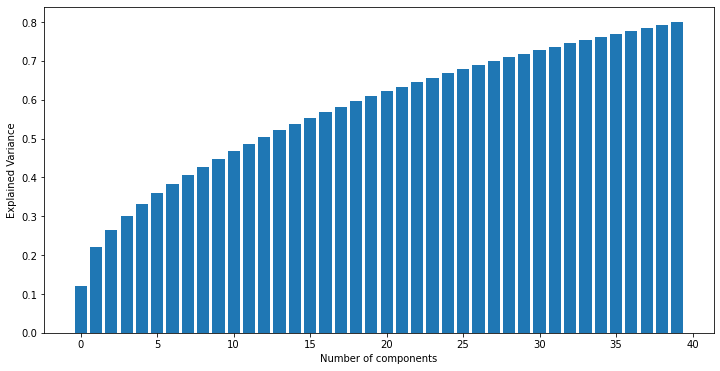

In [25]:
## plot explained variance and chose N leading PCs (choose N either by explained variance or try different values and choose best one)

n=40
plt.figure(figsize=(12,6))
plt.bar(np.arange(n), eigenvalues[:n].cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

n = 19, 60%

In [26]:
## train a linear model based on above N PCs and report out of sample accuracy (with cross-validation)

pca = PCA(n_components = 19) 
new_X_dataincome = pca.fit_transform(X_dataincome_S) 

np.random.seed(0)
# Apply cross-validation to diagnose model for overfitting
np.random.seed(2018)
R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2
n=100 #number of runs
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(sm.add_constant(new_X_dataincome[:,:]),y_dataincome,test_size=0.3) #randomly split data into training (70%) and test (30%)
    lm1_dataincome_pca =sm.OLS(y_dataincome,sm.add_constant(new_X_dataincome[:,:])).fit()
    R_IS.append(lm1_dataincome_pca.rsquared)   
    y_pred=lm1_dataincome_pca.predict(X_test)
    R_OS.append(r2_score(y_test,y_pred))
    
    #R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
print("IS R-squared is %.3f+-%.3f"%(np.mean(R_IS),np.std(R_IS)))
print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))

IS R-squared is 0.780+-0.000
OS R-squared is 0.777+-0.050


### Task 3: Try implementing Lasso regression (feature selection) over all the PCs.

Use alpha=10000 as the regularization parameter. Report out of sample mean R2 score by splitting data into train and test

In [27]:
## code here
from sklearn import linear_model
from sklearn.metrics import explained_variance_score
from sklearn import metrics

## train a linear model based on above N PCs and report out of sample accuracy (with cross-validation)

pca = PCA(X_dataincome.shape[1]) 
Xall_dataincome = pca.fit_transform(X_dataincome_S) 

In [30]:
X_train, X_test, y_train, y_test = train_test_split(Xall_dataincome[:,:], y_dataincome, test_size=0.3, random_state = 1)    
clf =linear_model.Lasso(alpha=10000).fit(Xall_dataincome[:,:], y_dataincome)
#print(clf.coef_)   
y_pred=clf.predict(X_test)
#print(clf.intercept_)
print("IN SAMPLE R2:",clf.score(X_train, y_train))
print("OUT OF SAMPLE R2::",clf.score(X_test, y_test))
#print("Accuracy:",explained_variance_score(y_test, y_pred))
print("The OS R-squared of Lasso is: {0}".format(r2_score(y_test,y_pred)))

IN SAMPLE R2: 0.66845297045671
OUT OF SAMPLE R2:: 0.6477821224964868
The OS R-squared of Lasso is: 0.6477821224964868


### Task 4: Implement cross-validation for Lasso PCA regression above with further splitting the training sample into training and validation and tuning the parameter over the validation sample

In [31]:
## code here
## train a linear model based on above N PCs and report out of sample accuracy (with cross-validation)

# Apply cross-validation to diagnose model for overfitting
np.random.seed(2018)
R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2
n=100 #number of runs
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(Xall_dataincome[:,:],y_dataincome,test_size=0.3) #randomly split data into training (70%) and test (30%)
    clf1 =linear_model.Lasso(alpha=10000).fit(Xall_dataincome[:,:], y_dataincome)    
    R_IS.append(clf1.score(X_train,y_train))   
    y_pred=clf1.predict(X_test)
    R_OS.append(clf1.score(X_test,y_test))
    
    #R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
print("IS R-squared is %.6f"%(np.mean(R_IS)))
print("OS R-squared is %.6f"%(np.mean(R_OS)))
print("The OS R-squared of Lasso is: {0}".format(r2_score(y_test,y_pred)))

IS R-squared is 0.662121
OS R-squared is 0.651831
The OS R-squared of Lasso is: 0.5883735881591043
